In [1]:
import tensorflow as tf
import numpy as np


x = tf.Variable(0, name='x')

model = tf.global_variables_initializer()

with tf.Session() as session:
    for i in range(5):
        session.run(model)
        x = x + 1
        print(session.run(x))

1
2
3
4
5


In [2]:
# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")
# w is the variable storing our values. It is initialised with starting "guesses"
# w[0] is the "a" in our equation, w[1] is the "b"
w = tf.Variable([1.0, 2.0], name="w")
# Our model of y = a*x + b
y_model = tf.multiply(x, w[0]) + w[1]

# Our error is defined as the square of the differences
error = tf.square(y - y_model)
# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(1000):
        x_value = np.random.rand()
        y_value = x_value * 2 + 6
        session.run(train_op, feed_dict={x: x_value, y: y_value})

    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))


Predicted model: 2.234x + 5.876


Predicted model: 2.050x + 5.723


/home/vikram/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vikram/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


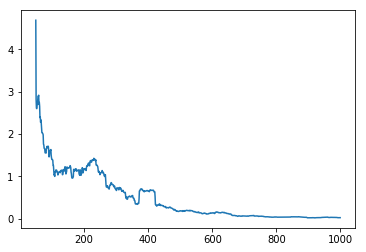

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(1000):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        x_value, y_value = session.run([x_train, y_train])
        _, error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        errors.append(error_value)
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()